# Built Graph
In this notebook we proceed building the ERN. In particular we create a graph characterized by the following structure:

* Nodes: authors of publications
* Edges: (u,v) if a coauthorship relation stands between u and v
* Weights: (u,v,w) where the weight corresponds to the number of common publications between u and v

For the tidiness of the code the used functions are stored in external modules which will be properly recalled when in use.

In [1]:
# Import useful library
import json
import matplotlib.pyplot as plt
from BuildGraphModule import *
from UniformData import *
from MultiGraph import *
%matplotlib inline

##### Load data: 

The loaded data are in the form describe in [DATA ACQUISITION]. To remind:

                               {ID_paper_1:{'Abstract': 'text', 
                                            'Title' : 'title', 
                                            'Date of publication' : '1999', 
                                            'Authors' : [a1, a2, a3], 
                                            'Epfl authors' : [{'name_author':'web_page'}], 
                                            'Involved Labs' : [{'name_lab' : 'lab_web_site'}], 
                                            'Keywords' : [k1, k2, k3]}
                                            
    
*_Remark_*: due to the fact that the web pages don't always contain all the information, the dictionary related to each paper may vary. It implies that for the further analysis it may happen that the number of publications taken into account will vary according to the information it relies on.

In [2]:
with open('paper.json', 'r') as f:
    data = json.load(f)

Decode authors name in order to get rid of duplicates due to spell differences. The used fuctions are store in the module [`UniformData.py`]().

In [3]:
# Uniform strings - Authors
data = uniform_authors(data)

In [4]:
# Uniform strings - EPFL Authors
data = uniform_epfl_authors(data)

## General graph
 Before getting focused on the EPFL network, we built a graph that includes also the external researchers. The functions used in this section are stored in the module [`BuildGraphModule.py`]().

In [5]:
# Define the list of authors
authors = get_authors(data, 'Authors')

In [6]:
# Obtain dictionary which connect authors to an identification number (and the reverse)
dictionary_a_id, dictionary_id_a = create_authors_id(authors, 'all')

In order to define the graph, for each author we provide the list of people he collaborates with.

In [7]:
# Define the dictionary (author, list collaborators)
dict_authors = list_coauthors(data)

 For each author we count the number of collaborations with the same colleague.

In [8]:
# Compute the dictionary (author, dict(collaborator: number of common publication))
dict_numb_coll = number_collaborations(dict_authors)

Keep only the set of collaborators

In [9]:
# Define the dictionary (author, set of collaborators)
dict_authors_set = set_coauthors(dict_authors)

Thus, define the edges of the graph.

In [10]:
# Create edges
edges = create_edges(dict_authors_set, dictionary_a_id)

In [11]:
G = create_simple_graph(dictionary_id_a, edges)

Name: 
Type: Graph
Number of nodes: 161431
Number of edges: 17345810
Average degree: 214.9006


In [1]:
# Add weights
l = 0
for i,j in G.edges():
    G[i][j]['weight'] = dict_numb_coll[dictionary_id_a[i]][dictionary_id_a[j]]
    l += 1
    print (l)

NameError: name 'G' is not defined

### Graph measures 
We are now going to compute some coefficients that may give us an idea of the structure of the graph.

#### Degree distribution


In [ ]:
G_deg = G.degree(G.nodes())
G_deg_values = sorted(G_deg.values(), reverse = True)

In [ ]:
plot_measures(G_deg_values, 'Degree distribution', 'Number of authors', 'Degree', 'degree_distribution')

#### PageRank centrality

In [ ]:
pr_centrality = nx.pagerank(G)
tuples_pr = pr_centrality.items()
pr_sorted = sorted(pr_centrality.values(),reverse = True)

In [ ]:
plot_measures(pr_sorted, 'Page Rank centrality', 'Authors', 'Page Rank', 'page_rank_centrality')

#### Average clustering coefficient

In [ ]:
avg_coeff = nx.average_clustering(G)

## EPFL graph

Repeat the same operations trimming the graph by using only Epfl authors.

In [5]:
authors_epfl = get_authors(data, 'Epfl authors')
# Due to the format which the authors have been saved

# We initialize a new list
epfl_authors = []

# Then for each element in the previous list
for i in authors_epfl:
    # We unpack the content
    epfl_authors += list(i.keys())

In [6]:
# Id-Author / Author-ID
dictionary_a_id_epfl, dictionary_id_a_epfl = create_authors_id(epfl_authors, 'epfl')

In [7]:
# EPFL - COAUTORI NELLA LISTA DI EPFL AUTHORS
dict_authors_epfl = list_coauthors_epfl(data)

In [8]:
# Number of collaborations
dict_numb_coll_epfl = number_collaborations(dict_authors_epfl)

In [9]:
# Coauthors set
dict_authors_set_epfl = set_coauthors(dict_authors_epfl)

In [10]:
# Set of edges
edges_epfl = create_edges(dict_authors_set_epfl, dictionary_a_id_epfl)

In [11]:
G = create_simple_graph(dictionary_id_a_epfl, edges_epfl)

Name: 
Type: Graph
Number of nodes: 13451
Number of edges: 45417
Average degree:   6.7530


In [12]:
for i,j in G.edges():
    G[i][j]['weight'] = dict_numb_coll_epfl[dictionary_id_a_epfl[i]][dictionary_id_a_epfl[j]]

In [15]:
G_deg = G.degree(G.nodes())
G_deg_values = sorted(G_deg.values(), reverse = True)

In [ ]:
plot_measures(G_deg_values, 'Degree distribution', 'Number of authors', 'Degree', 'degree_distribution')

In [17]:
def getKey(item):
    return item[1]

In [18]:
pr_centrality = nx.pagerank(G)
tuples_pr = pr_centrality.items()
pr_centralities_sorted = sorted(tuples_pr, key = getKey)
top_10_pr_centr = pr_centralities_sorted[-10:]

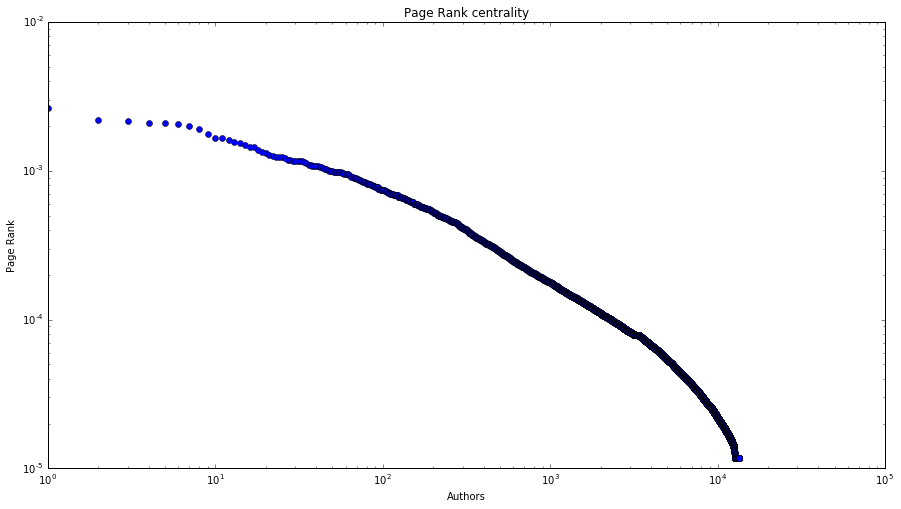

In [19]:
plot_measures(pr_sorted, 'Page Rank centrality', 'Authors', 'Page Rank', 'page_rank_centrality')

In [20]:
top_10_pr_centr

[(5371, 0.0017781297277756783),
 (6680, 0.0019004403741419156),
 (9693, 0.0019883318233957525),
 (10707, 0.002068816699279793),
 (4746, 0.0020956810108147036),
 (10931, 0.002100858370545831),
 (1258, 0.0021782483769789023),
 (10472, 0.0022057602061739566),
 (6163, 0.0026559970719667375),
 (8752, 0.002696503540033573)]

In [21]:
list_top_ten = []
for i in top_10_pr_centr:
    list_top_ten += [dictionary_id_a_epfl[i[0]]]

In [22]:
list_top_ten

['renaud philippe',
 'aberer karl',
 'thiran jean-philippe',
 'de micheli giovanni',
 'leblebici yusuf',
 'vetterli martin',
 'perriard yves',
 'marechal francois',
 'schleiss anton',
 'graetzel michael']

In [73]:
avg_coeff = nx.average_clustering(G)

In [74]:
avg_coeff

0.5448363209546251

In [84]:
G_rnd = nx.fast_gnp_random_graph(len(nodes), 0.01)

In [85]:
avg_coeff_rnd = nx.average_clustering(G_rnd)

In [86]:
avg_coeff_rnd

0.01002085524459042

### Get the lab for the authors

In [14]:
# Get the dictionary (author, list collaborators with info)
dict_authors_epfl = get_collaborators(data)

In [15]:
# Get the dictionary (author, dict(collaborator,list of common works))
dict_coautorship_papers = coauthorship_papers(dict_authors_epfl)

In [16]:
# Define the dictionary (authos, set of papers)
list_paper = paper_per_author(dict_coautorship_papers)

In [17]:
from collections import defaultdict
papers = defaultdict(int)
for a in list(list_paper.keys()):
    for i in list_paper[a]:
        papers[i] += 1

In [18]:
len(papers)

44975

In [18]:
# Dictionary (author, website)
dict_author_site = lab_site(data)

Retrieve the labs of authors. Whether only one lab is mentioned on InfoScience page, the Epfl authors are assumed to belong to that lab. Whether more than one lab is involved, we scrape the People page of the author. This procedure can lead to loosing some information since the pages of authors that are no more part of the Epfl have no longer the page on people.

In [24]:
import requests
from bs4 import BeautifulSoup

In [25]:
#author_lab = get_authors_lab(list_paper, data)[0]

In [26]:
import pickle
#pickle.dump(author_lab, open('author_lab.p', 'wb')) # Store the variable in a file.

# Basic statistics on the graph - @TODO - INTRODUCTION

In [37]:
# Get the range of years
dict_years = defaultdict(int)
dict_year_authors = defaultdict(float)
dict_year_epfl_authors = defaultdict(float)
dict_authors = defaultdict(float)
for paper in list(data.keys()):
    try:
        #print (paper['Publication date'])
        dict_years[data[paper]['Publication date']] += 1
        dict_year_authors[data[paper]['Publication date']] += len(data[paper]['Authors'])
        dict_year_epfl_authors[data[paper]['Publication date']] += len(data[paper]['Epfl authors'])
        
    except:
        pass
    try:
        for author in data[paper]['Epfl authors']:
            dict_authors[author.keys()[0]] += 1
    except:
        continue

In [40]:
dict_year_epfl_authors

defaultdict(float,
            {'0': 2.0,
             '1927': 0.0,
             '1929': 0.0,
             '1930': 0.0,
             '1933': 0.0,
             '1934': 0.0,
             '1937': 0.0,
             '1938': 0.0,
             '1940': 0.0,
             '1941': 0.0,
             '1943': 0.0,
             '1944': 0.0,
             '1945': 2.0,
             '1946': 0.0,
             '1947': 0.0,
             '1948': 0.0,
             '1949': 2.0,
             '1950': 1.0,
             '1951': 2.0,
             '1952': 0.0,
             '1953': 0.0,
             '1954': 0.0,
             '1955': 0.0,
             '1956': 0.0,
             '1957': 0.0,
             '1958': 0.0,
             '1959': 1.0,
             '1960': 1.0,
             '1961': 3.0,
             '1962': 3.0,
             '1963': 5.0,
             '1964': 14.0,
             '1965': 7.0,
             '1966': 14.0,
             '1967': 16.0,
             '1968': 14.0,
             '1969': 27.0,
             '197

In [21]:
dict_year_authors.pop('0', None)
dict_year_authors.pop('August 31-September 2 2005', None)
dict_year_authors.pop('2017', None)

12.0

In [20]:
def normalize_dict(d):
    factor=1.0/sum(list(d.values()))
    for k in d:
        d[k] = d[k]*factor
    return d

In [22]:
open_measure = defaultdict(float)
open_measure_scaled = defaultdict(float)
for year in list(dict_year_authors.keys()):
    open_measure[year] = (dict_year_epfl_authors[year] / dict_year_authors[year])
    open_measure_scaled[year] = (dict_year_epfl_authors[year] / dict_year_authors[year])*dict_years[year]

In [26]:
import numpy as np

In [30]:
def getKey(item):
    return item[0]

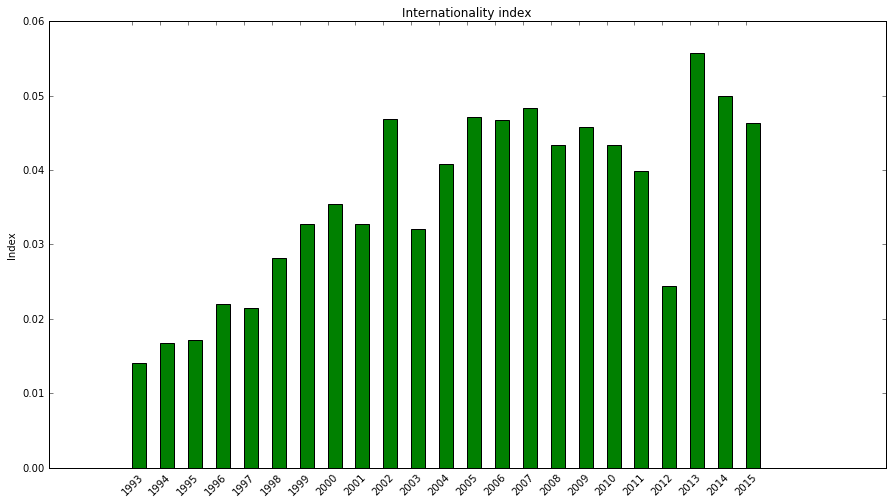

In [34]:
plt.figure(figsize=(15,8), dpi=80)
ind = np.arange(1993,2016)
open_measure_scaled.pop('0', None)
open_measure_scaled.pop('August 31-September 2 2005', None)
open_measure_scaled.pop('2017', None)
normalize_dict(open_measure_scaled)
tuples_pr = open_measure_scaled.items()
sort = sorted(tuples_pr, key = getKey)
x = [int(i[0]) for i in sort[-24:-1]]
y = [i[1] for i in sort[-24:-1]]
plt.bar(x, y, 0.5, color='g')

plt.ylabel('Index')
plt.title("Internationality index")
plt.xticks(ind, np.arange(1993,2016), rotation = 45)
#plt.yticks(np.arange(0, 2900, 300))
plt.savefig('internationality.png', dpi=100)

In [35]:
import pickle
lab = pickle.load(open('author_lab.p', 'rb'))

In [27]:
# Get the range of years
dict_years = defaultdict(int)
for paper in list(data.keys()):
    try:
        #print (paper['Publication date'])
        dict_years[data[paper]['Publication date']] += 1
    except:
        continue

In [28]:
#dict_years

In [29]:
del dict_years['August 31-September 2 2005']
del dict_years['0']

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

After a first glance twe observe that:
* The oldest publications are thos which may contain fragmented and incomplete information
* The number of publication in considerably higher from the latest 90s to nowdays

As consequence we decide to focus our attention on the publications corresponding to the aforementioned period.

<Container object of 84 artists>

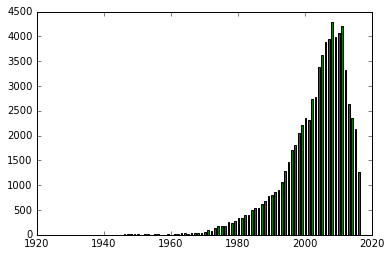

In [31]:
plt.bar(dict_years.keys(), dict_years.values(), 0.5, color='g')

In [44]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) >= 1993:
            data_cut[paper] = data[paper]
    except:
        continue

## LABS

In [45]:
dict_lab_site, dict_labs, dict_labs_paper = lab_dictionaries(data_cut)

In [26]:
# SORT LABORATORIES BY VALUES!!!!!
dict_labs

defaultdict(int,
            {' IPESE (sci-sti-fm)': 106,
             ' Prof. Tang Group': 10,
             ' Programmable Biomaterials Laboratory': 4,
             'ANA': 53,
             'Adaptive Micronano Wave Systems': 107,
             'Advanced Oxidation Processes Group': 113,
             'Advanced Photonics Laboratory': 393,
             'Air and Soil Pollution Laboratory': 227,
             'Algorithmics Laboratory': 46,
             'Applied Computing and Mechanics Laboratory': 534,
             'Applied Signal Processing Group': 75,
             'Applied Superconductivity Group': 20,
             'Applied Thermodynamics and Thermal Turbomachinery Laboratory': 103,
             'Architecture, criticism, history and theory': 10,
             'Archives of Modern Building': 64,
             'Archizoom - Conferences and exhibitions': 1,
             'Artificial Intelligence Laboratory': 419,
             'Arts of sciences laboratory - Archives of imaginary': 71,
             'A

In [29]:
dict_labs_sorted = sorted(dict_labs.items(), key=lambda value: value[1], reverse = True)

In [30]:
dict_labs_sorted

[('Swiss Plasma Center', 3344),
 ('Center for Research In Plasma Physics', 3221),
 ('Offered in consultation at the EPFL Library', 1622),
 ("L'IDIAP Laboratory", 1376),
 ('Transportation and Mobility Laboratory', 1186),
 ('Human and social sciences teaching program', 1146),
 ('Sensors, Actuators and Microsystems Laboratory', 1085),
 ('Urban Sociology Laboratory', 825),
 ('Electromagnetics and Acoustics Laboratory', 808),
 ('Laboratory of Photonics and Interfaces', 764),
 ('Laboratory for Computer Communications and Applications', 717),
 ('Hydraulic Constructions Laboratory', 666),
 ('Laboratory of Composite and Polymer Technology', 663),
 ('Laboratory for Industrial Energy Systems', 598),
 ('Chôros Laboratory', 590),
 ('Ceramics Laboratory', 543),
 ('Applied Computing and Mechanics Laboratory', 534),
 ('Laboratory of Quantum Optoelectronics', 502),
 ('Ecological Engineering Laboratory', 499),
 ('High Energy Physics Laboratory', 491),
 ('Chair of Operations Research SO', 476),
 ('Urban 

## Scrape EPFL STRUCTURE

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# From the root (EPFL): obtain the first level of the tree (schools)
req = requests.get('https://search.epfl.ch/ubrowse.action?acro=EPFL')
html = req.content

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Obtain the link for the schools
new_links_to_go = []
dictio = []
for i in soup.findAll('div', {'class':'unit_name'}):
    if i.findAll('a')[0].text.strip()[:6] == 'School':
        new_links_to_go += [i.findAll('a')[0].get('href')]
        dictio += [i.findAll('a')[0].text.strip()]

In [5]:
#prova = {}
#traverse_epfl_tree('https://search.epfl.ch/ubrowse.action?acro=CDH')

In [ ]:
# Store the result related to each different school
#import pickle
#pickle.dump(prova, open('CDH.p', 'wb')) # Store the variable in a file.

In [41]:
# Get dictionary (lab,school)
def school_lab(dict_lab_site, name_school):
    
    school = pickle.load(open(name_school + '.p', 'rb')) # Recall 
    lab_school = {}
    for i in list(dict_lab_site.keys()):
        for nodes in list(school.keys()):
            list_node = school[nodes]
            if i in list_node:
                lab_school[i] = name_school
                break
            else:
                continue   
    
    return lab_school

In [47]:
lab_school = school_lab(dict_lab_site, 'IC')